Trainable Parameters: 9


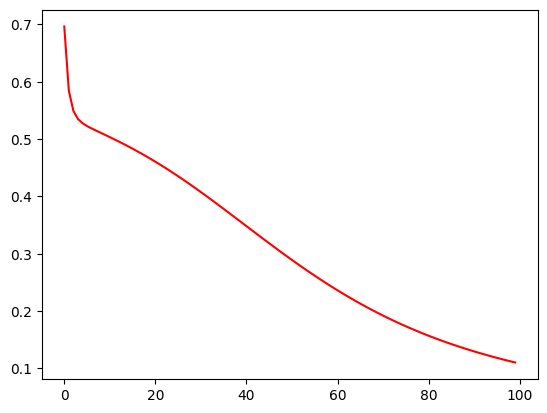

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt


def sigmoid(A):
  return 1.0 / (1.0 + np.exp(-A))


def cross_entropy_loss(Y, Y_hat):
  return -(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))


def empirical_risk(Y, Y_hat):
  s = Y.size
  return (1.0 / s) * np.ones((1, s)).dot(cross_entropy_loss(Y, Y_hat))[0][0]


class Neural_Network():
  
  def __init__(self, alpha=1.0):
    self.W1 = np.array([[1, 0],
                        [0, 1]])
    
    self.b1 = np.array([[0, 0]])

    self.W2 = np.array([[1],
                        [-1]])

    self.b2 = np.array([[0]])
    
    print("Trainable Parameters:", self.count_trainable_parameters())
    
    self.alpha = alpha
    
    self.Z1 = None
    self.A1 = None
    self.Z2 = None
    self.A2 = None
    
    self.grad_W2 = None
    self.grad_b2 = None
    self.grad_W1 = None
    self.grad_b1 = None


  def count_trainable_parameters(self):
    return self.W1.size + self.b1.size + self.W2.size + self.b2.size
  
  def forward(self, X):
    n = X.shape[0]
    self.Z1 = X.dot(self.W1) + np.ones((n, 1)).dot(self.b1)
    self.A1 = sigmoid(self.Z1)
    self.Z2 = self.A1.dot(self.W2) + np.ones((n, 1)).dot(self.b2)
    self.A2 = sigmoid(self.Z2)
    return self.A2
  
  def backward(self, X, Y):
    n = Y.shape[0]
    dLdZ2 = (1.0 / n) * (self.A2 - Y).transpose()
    self.grad_W2 = dLdZ2.dot(self.A1)
    self.grad_b2 = dLdZ2.dot(np.ones((n, 1)))
    self.grad_W1 = (dLdZ2.transpose().dot(self.W2.transpose()) * self.A1 * \
                    (1 - self.A1)).transpose().dot(X)
    self.grad_b1 = (dLdZ2.transpose().dot(self.W2.transpose()) * self.A1 * \
                    (1 - self.A1)).transpose().dot(np.ones((n, 1)))
  
  def update_weights(self):
    self.W2 = self.W2 - self.alpha * self.grad_W2.transpose()
    self.b2 = self.b2 - self.alpha * self.grad_b2.transpose()
    self.W1 = self.W1 - self.alpha * self.grad_W1.transpose()
    self.b1 = self.b1 - self.alpha * self.grad_b1.transpose()
  
  def gradient_descent(self, X, Y, number_of_steps):
    empirical_risk_logging = list()
    for step in range(number_of_steps):
      Y_hat = self.forward(X)
      self.backward(X, Y)
      self.update_weights()
      empirical_risk_logging.append(empirical_risk(Y, Y_hat))
    plt.plot(list(range(number_of_steps)), empirical_risk_logging, color="red")
    plt.show()

    
if __name__ == "__main__":
  
  X = np.array([[0, 0],
                [0, 1],
                [1, 0],
                [1, 1]])
  
  Y = np.array([[0],
                [1],
                [1],
                [1]])
  
  model = Neural_Network(alpha=1.0)
  
  model.gradient_descent(X, Y, number_of_steps=100)